In [29]:
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

# Crime data  
Link: https://www.rdocumentation.org/packages/MASS/versions/7.3-54/topics/UScrime  
## References
Venables, W. N. and Ripley, B. D. (1999) Modern Applied Statistics with S-PLUS. Third Edition. Springer.

## Independent Variables
M: percentage of males aged 14-24  
So: indicator variable for a Southern state  
Ed: mean years of schooling  
Po1: police expenditure in 1960  
Po2: police expenditure in 1959  
LF: labor force participation rate  
M.F: number of males per 1000 females  
Pop: state population  
NW: number of non-whites per 1000 people  
U1: unemployment rate of urban males 14-24  
U2: unemployment rate of urban males 35-39  
GDP: gross domestic product per head  
Ineq: income inequality  
Prob: probability of imprisonment  
Time: average time served in state prisons  
y: rate of crimes in a particular category per head of population  

In [30]:
# read in the uscrime file
df = pd.read_csv("uscrime.csv")

In [31]:
df.head()

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,GDP,Ineq,Prob,Time,y
0,151,1,91,58,56,510,950,33,301,108,41,394,261,0.084602,26.2011,791
1,143,0,113,103,95,583,1012,13,102,96,36,557,194,0.029599,25.2999,1635
2,142,1,89,45,44,533,969,18,219,94,33,318,250,0.083401,24.3006,578
3,136,0,121,149,141,577,994,157,80,102,39,673,167,0.015801,29.9012,1969
4,141,0,121,109,101,591,985,18,30,91,20,578,174,0.041399,21.2998,1234


In [35]:
features = df.columns.values[:-1]
print(features)
# all variables except dependent variable
X = df.loc[:,df.columns!='y']
# dependent variable
y = df.y

['M' 'So' 'Ed' 'Po1' 'Po2' 'LF' 'M.F' 'Pop' 'NW' 'U1' 'U2' 'GDP' 'Ineq'
 'Prob' 'Time']


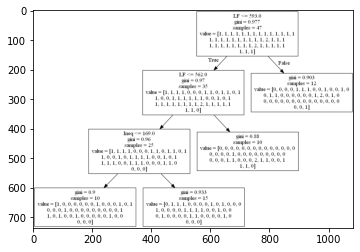

In [41]:
#source: https://www.w3schools.com/python/python_ml_decision_tree.asp
dtree = DecisionTreeClassifier(min_samples_leaf=10,max_leaf_nodes=7)
dtree = dtree.fit(X, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')
img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()